# Mountain cart

This is the notebook for the implement the mountain cart problem. 
It is divided into:
1. Random Agent
2. DQN approach
3. Dyna approach

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

# **1.** Random Agent

In [8]:
from RandomAgent import RandomAgent

env = gym.make('MountainCar-v0')#, render_mode = "human")
agent = RandomAgent(env)
num_episodes = 100

rewards = []
for episode in tqdm(range(num_episodes)):
    seed = np.random.randint(0, 100000)
    state = env.reset(seed=seed)
    done = False
    total_reward = 0

    while not done:
        action = agent.select_action(state)
        next_state, reward, done, truncated, _ = env.step(action)
        agent.observe(state, action, next_state, reward)
        agent.update()
        total_reward += reward
        state = next_state

    rewards.append(total_reward)

  4%|▍         | 4/100 [00:01<00:37,  2.55it/s]


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.plot(rewards, color = "purple")
ax.set_title("The reward for Random Agent")
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode number")

In [ ]:
n_episodes=100
durations=[]
for i in tqdm(range(n_episodes)):
    t0 = time()
    done = False
    seed = np.random.randint(0, 100000)
    state, info = env.reset(seed=seed), None
    episode_reward = 0
    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)

        episode_reward += reward

        state = next_state
        done = terminated or truncated
    t1=time()
    durations.append(t1-t0)

In [ ]:
plt.scatter(range(n_episodes),durations)
plt.yscale('log')
plt.xlabel('N°Episode')
plt.ylabel('Duration (s)')
plt.title('Duration of episodes')

# **2.** DQN Agent

In [ ]:
from DQN import DQNAgent, DQNnetwork

num_episodes = 1000
env = gym.make('MountainCar-v0', render_mode="human") #, render_mode = "human"
state_size, action_size = env.observation_space.shape[0], env.action_space.n
agent = DQNAgent(env, state_size, action_size)
#rewards, durations = agent.train(env, agent, num_episodes)
#agent.save_agent(f"DQN_{num_episodes}_episodes")

KeyboardInterrupt: 

In [ ]:
agent.plots()

NameError: name 'agent' is not defined

In [ ]:
num_episodes = 1000
env = gym.make('MountainCar-v0') #, render_mode = "human"
state_size, action_size = env.observation_space.shape[0], env.action_space.n
agent = DQNAgent(env, state_size, action_size)
agent.load_agent(f"DQN_{num_episodes}_episodes")
agent.plots()

# **2.1** Modified Reward function of the DQN environment

In [8]:
import gym
import math
import numpy as np
from typing import Optional

# modify the environment class by inheriting the gymnasium environment class of the mountain cart, and changing the step() function such that the reward is always 1
class MountainCarReward1(gym.Env):
    def __init__(self, render_mode: Optional[str] = None, goal_velocity=0):
        self.render_mode = render_mode
        self.env = gym.make('MountainCar-v0', render_mode=render_mode)
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        self.reward_range = self.env.reward_range
        self.number_steps = 0

    def step(self, action: int, reward_function="-1"):
        assert self.action_space.contains(action), f"{action!r} ({type(action)}) invalid"

        state, reward, done, truncated, _ = self.env.step(action)
        self.number_steps += 1
        if self.number_steps == 1:
            self.starting_state = state
        
        if reward_function == "euclidean":
            aux_reward = 100 if done else np.sqrt(np.abs(state[0] - (-0.5))**2)
        
        elif reward_function == "abs": # reward distance from start
            
            position = state[0]
            starting_position = -0.5  # starting position
            distance_from_start = np.abs(position - starting_position)
            aux_reward = 0 if distance_from_start == 1.1 else - 1 / (distance_from_start + 1)

        if self.number_steps == 200:
            truncated = True

        return np.array(state, dtype=np.float32), reward, done, truncated, {}, aux_reward

    def reset(self,
        *,
        seed: Optional[int] = None,
        options: Optional[dict] = None,
):
        self.number_steps = 0
        return self.env.reset(seed=seed, options=options)

    def render(self, render_mode='human'):
        return self.env.render(render_mode=render_mode)

    def close(self):
        return self.env.close()

In [21]:
from DQN import DQNAgent, DQNnetwork

num_episodes = 3000
reward_function = "abs"

env = MountainCarReward1(render_mode=None)
state_size, action_size = env.observation_space.shape[0], env.action_space.n
agent = DQNAgent(env, state_size, action_size)
agent.train(env, agent, num_episodes, reward_function=reward_function)
agent.save_agent(f"DQN_{num_episodes}_episodes_{reward_function}")


100%|██████████| 3000/3000 [39:03<00:00,  1.28it/s]

Directory created:  /Users/silviaromanato/Desktop/EPFL/MA4/ANN:RL/MountainCartRL/agents_saved/DQN_3000_episodes_abs/
Agent saved on path:  /Users/silviaromanato/Desktop/EPFL/MA4/ANN:RL/MountainCartRL/agents_saved/DQN_3000_episodes_abs/


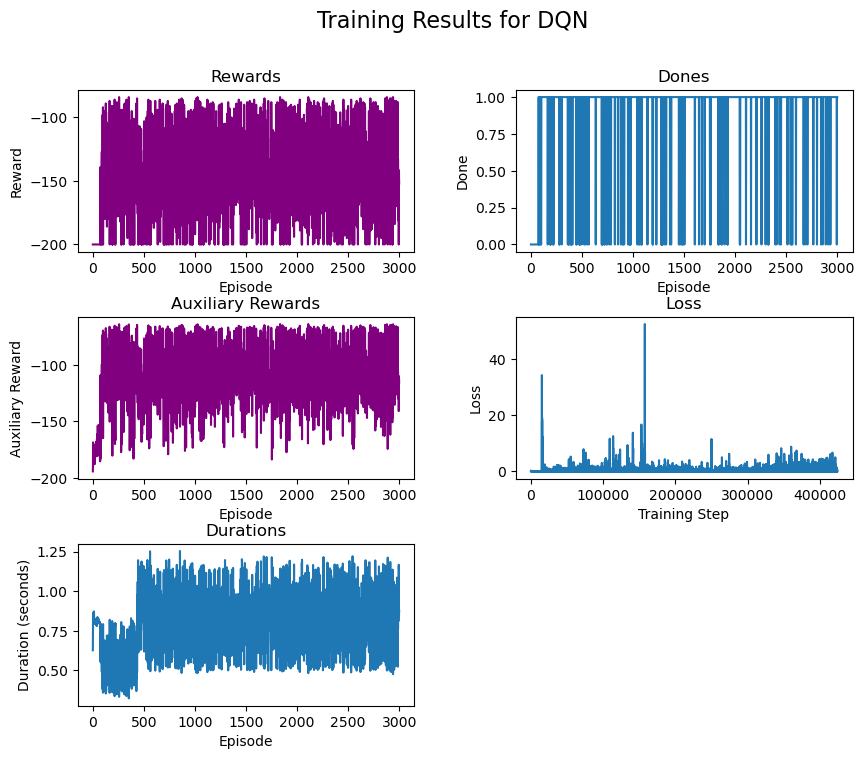

In [22]:
agent.plots()